# 构建逻辑回归模型对鸢尾花数据集进行多分类

张子豪 2019-12-7

- 导入数据集
- 对数据进行标准化预处理
- 构建逻辑回归模型
- 绘制逻辑回归分类决策边界

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

# 导入数据集

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

# 取第三列和第四列特征，也就是花瓣长度petal length、花瓣宽度 petal width
X = iris.data[:, [2, 3]]
# 取标签
y = iris.target

# 划分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 对数据集进行标准化预处理

In [4]:
from sklearn.preprocessing import StandardScaler
# StandardScaler: Standardize features by removing the mean and scaling to unit variance
# z = (x - u) / s
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

对训练集特征进行标准化，求出训练集两个特征的均值和方差。

In [5]:
sc.mean_

array([3.82857143, 1.22761905])

In [6]:
sc.scale_

array([1.79595918, 0.77637684])

用求得的均值和方差，对训练集和测试集都进行标准化。也就是对每个数据，减去均值，除以方差。

In [7]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
X_train_std.shape

(105, 2)

In [9]:
X_test_std.shape

(45, 2)

In [19]:
X_train_std.mean()

-1.4380031557049647e-16

In [20]:
X_train_std.min()

-1.5192836530366176

In [21]:
X_train_std.max()

1.7101884052506424

In [15]:
X_train_std

array([[-0.18295039, -0.29318114],
       [ 0.93066067,  0.7372463 ],
       [ 1.04202177,  1.63887031],
       [ 0.6522579 ,  0.35083601],
       [ 1.09770233,  0.7372463 ],
       [ 0.03977182, -0.16437771],
       [ 1.26474398,  1.38126345],
       [ 0.48521625,  0.47963944],
       [-0.01590873, -0.16437771],
       [ 0.59657735,  0.7372463 ],
       [ 0.70793846,  0.35083601],
       [ 0.37385514,  0.60844287],
       [ 0.6522579 ,  0.86604973],
       [ 0.48521625,  0.22203258],
       [ 0.76361901,  0.99485316],
       [ 0.37385514,  0.47963944],
       [-1.24088089, -1.32360858],
       [ 0.70793846,  0.86604973],
       [ 0.20681348,  0.09322915],
       [-0.12726983,  0.09322915],
       [ 0.09545238,  0.09322915],
       [ 0.42953569,  0.22203258],
       [ 1.20906343,  0.7372463 ],
       [-1.29656144, -1.32360858],
       [-1.51928365, -1.45241201],
       [ 0.81929956,  0.86604973],
       [ 0.20681348, -0.03557428],
       [-1.18520034, -1.32360858],
       [-1.29656144,

In [22]:
X_test_std.mean()

-0.12621255284827895

In [23]:
X_test_std.min()

-1.5749642057657083

In [24]:
X_test_std.max()

1.6388703098542574

In [25]:
X_test_std

array([[ 0.70793846,  1.51006688],
       [ 0.09545238, -0.29318114],
       [-1.35224199, -1.32360858],
       [ 1.37610509,  0.7372463 ],
       [-1.29656144, -1.32360858],
       [ 1.20906343,  1.63887031],
       [-1.40792255, -1.19480515],
       [ 0.48521625,  0.35083601],
       [ 0.5408968 ,  0.22203258],
       [ 0.09545238,  0.09322915],
       [ 0.98634122,  0.22203258],
       [ 0.37385514,  0.35083601],
       [ 0.48521625, -0.03557428],
       [ 0.42953569,  0.35083601],
       [ 0.48521625,  0.22203258],
       [-1.35224199, -1.45241201],
       [ 0.37385514,  0.35083601],
       [ 0.31817459, -0.03557428],
       [-1.35224199, -1.19480515],
       [-1.40792255, -1.06600172],
       [ 0.59657735,  0.99485316],
       [ 0.37385514,  0.35083601],
       [-1.07383923, -1.32360858],
       [-1.35224199, -1.32360858],
       [ 0.5408968 ,  0.7372463 ],
       [-1.57496421, -1.32360858],
       [-1.07383923, -1.06600172],
       [ 0.26249403,  0.09322915],
       [-0.29431149,

合并训练集和测试集的特征和标签

In [26]:
# vstack: Stack arrays in sequence vertically (row wise).
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [27]:
X_combined_std.shape

(150, 2)

In [28]:
y_combined.shape

(150,)

# 逻辑回归模型构建

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
test_example = X_test_std[0,:].reshape(1,-1)

In [31]:
test_example

array([[0.70793846, 1.51006688]])

In [32]:
lr.predict(test_example) # 2

array([2])

In [33]:
lr.predict_proba(test_example) # 查看第一个测试样本属于各个类别的概率

array([[1.78177322e-11, 6.12453348e-02, 9.38754665e-01]])

# 绘制决策边界

## 构建绘制决策边界的绘图函数（直接运行代码即可）

In [37]:
# 直接运行本代码块即可
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 设置符号和颜色
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 绘制决策边界
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # meshgrid: Return coordinate matrices from coordinate vectors.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(xx1.shape)
    print(xx1)
    print('*'*20)
    print(xx2.shape)
    print(xx2)
    print('*'*20)
    print(Z.shape)
    print(Z)
    Z = Z.reshape(xx1.shape)
    print('*'*20)
    print(Z.shape)
    print(Z)
    # contourf: 绘制等高线
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 按颜色绘制不同种类的鸢尾花
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        
    # 对于测试集中的数据，画个圆圈突出强调
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=90, label='test set', edgecolors='k')

## 绘制决策边界

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(255, 265)
[[-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]
 ...
 [-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]]
********************
(255, 265)
[[-2.45241201 -2.45241201 -2.45241201 ... -2.45241201 -2.45241201
  -2.45241201]
 [-2.43241201 -2.43241201 -2.43241201 ... -2.43241201 -2.43241201
  -2.43241201]
 [-2.41241201 -2.41241201 -2.41241201 ... -2.41241201 -2.41241201
  -2.41241201]
 ...
 [ 2.58758799  2.58758799  2.58758799 ...  2.58758799  2.58758799
   2.58758799]
 [ 2.60758799  2.60758799  2.60758799 ...  2.60758799  2.60758799
   2.60758799]
 [ 2.62758799  2.62758799  2.62758799 ...  2.62758799  

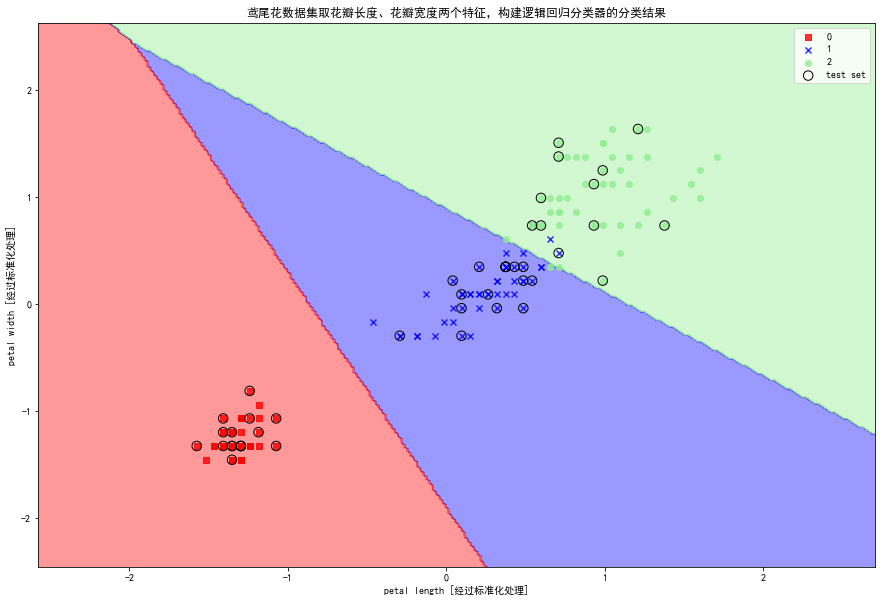

In [38]:
# 设置绘图大小
plt.style.use({'figure.figsize':(15,10)})

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [经过标准化处理]')
plt.ylabel('petal width [经过标准化处理]')
plt.legend(loc='upper right') # 图例放在右上角
plt.title('鸢尾花数据集取花瓣长度、花瓣宽度两个特征，构建逻辑回归分类器的分类结果')
plt.show()